# Llama3SP - Model Analysis Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Within Project Models Analysis

### Results dataframe

In [2]:
llama3_within_results = pd.read_csv("./llama3_within_results.csv")
llama3_within_results.rename(columns={"Llama3.2": "Llama3SP"}, inplace=True)

llama3sp_within_results = pd.read_csv("./llama3sp_within_results.csv")
llama3sp_within_results.rename(columns={"MAE": "Llama3SPv2"}, inplace=True)

gpt2sp_within_results = pd.read_csv("./GPT2SP_within_proj_data.csv")

In [3]:
within_results = gpt2sp_within_results
within_results = within_results.merge(llama3_within_results, on='Project', how='left')
within_results = within_results.merge(llama3sp_within_results, on='Project', how='left')

within_results

,Project,SP_mean,SP_std,GPT2SP,DeepSE,LSTM+RF,LSTM+SVM,Doc2Vec+RF,BOW+RF,LSTM+ATLM,LSTM+LR,Median,Mean,Llama3SP,Llama3.2+SPWordLevel,Llama3.2+SPWordPiece,Llama3.2+SPSentencePiece,Llama3SPv2,MdAE,SA
0,appceleratorstudio,5.64,3.33,1.53,1.36,1.62,1.46,1.62,1.83,1.59,1.68,1.84,2.08,1.65,1.50,1.67,1.64,1.59,1.34,65.28
1,aptanastudio,8.02,5.95,3.52,2.71,2.96,3.06,3.20,2.97,3.06,3.75,3.71,3.15,3.74,3.76,4.04,3.74,3.89,3.10,42.05
2,bamboo,2.42,2.14,0.77,0.74,1.01,0.81,1.12,1.34,1.97,1.26,1.32,1.75,1.10,1.43,1.17,0.97,1.11,1.01,19.50
3,clover,4.59,6.55,3.76,2.11,3.08,2.50,3.16,2.98,3.11,3.36,2.84,3.49,4.08,4.90,3.84,3.82,3.99,2.61,10.45
4,datamanagement,9.57,16.61,5.39,3.77,4.51,4.20,4.71,4.78,4.70,5.30,4.82,5.29,6.45,16.78,6.78,7.17,5.84,2.94,24.53
5,duracloud,2.13,2.03,0.80,0.68,0.69,0.75,0.77,0.96,0.87,0.80,0.73,1.30,1.05,1.36,1.29,1.10,1.01,0.70,22.61
6,jirasoftware,4.43,3.51,1.57,1.38,1.71,2.04,2.10,2.10,2.10,2.10,2.93,2.48,2.05,2.32,2.13,1.90,2.38,1.82,24.54
7,mesos,3.09,2.42,1.21,1.02,1.08,1.07,1.14,1.31,1.08,1.10,1.73,1.64,1.38,1.51,1.19,1.29,1.27,1.03,43.57
8,moodle,15.54,21.65,8.38,5.97,9.86,6.70,8.02,10.20,9.97,9.97,7.18,10.90,11.61,11.64,13.80,11.22,13.90,12.57,-109.09
9,mule,5.08,3.50,2.61,2.18,2.20,2.28,2.21,2.31,2.46,2.46,2.69,2.59,2.65,2.69,2.80,2.51,2.76,2.55,33.16


In [4]:
within_results.to_csv('within_results.csv', index=False)

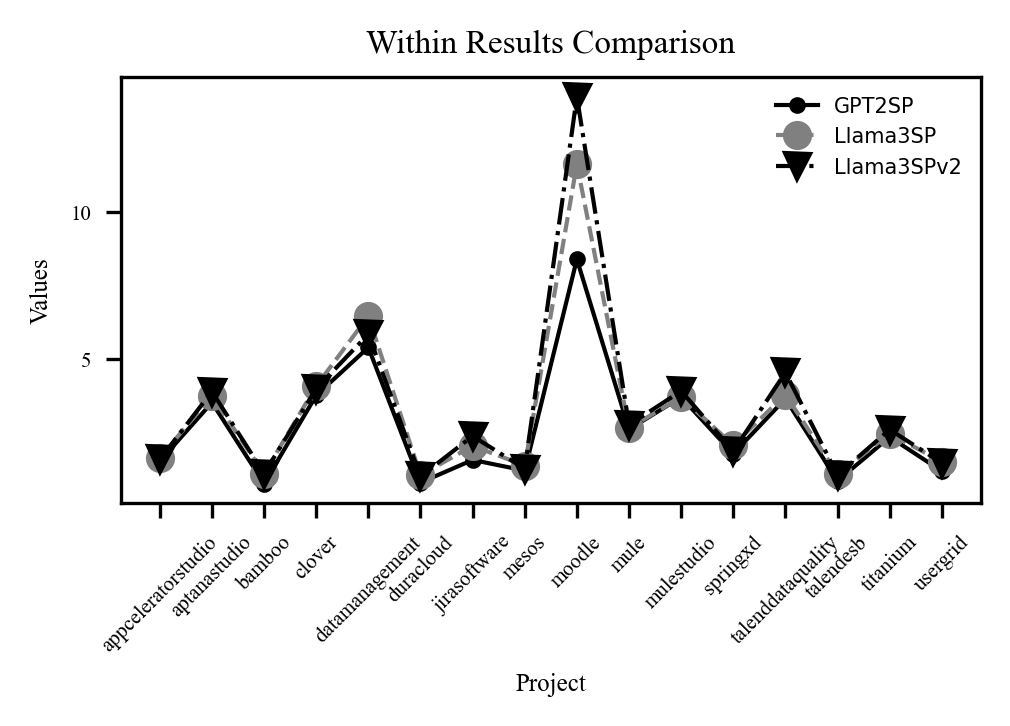

In [5]:
# Set the figure size to column width (3.5 inches) and high DPI for IEEE standards
plt.figure(figsize=(3.5, 2.5), dpi=300)

# Plot the results of GPT2SP with different line styles
plt.plot(within_results['Project'], within_results['GPT2SP'], label='GPT2SP', marker='.', linestyle='-', color='black', linewidth=1)

# Plot the results of Llama3SP
plt.plot(within_results['Project'], within_results['Llama3SP'], label='Llama3SP', marker='o', linestyle='--', color='gray', linewidth=1)

# Plot the results of Llama3SP Custom model
plt.plot(within_results['Project'], within_results['Llama3SPv2'], label='Llama3SPv2', marker='v', linestyle='-.', color='black', linewidth=1)

# Set labels and title with smaller font sizes
plt.xlabel('Project', fontsize=6, fontname='Times New Roman')
plt.ylabel('Values', fontsize=6, fontname='Times New Roman')
plt.title('Within Results Comparison', fontsize=8, fontname='Times New Roman')

# Adjust x-axis ticks for clarity
plt.xticks(rotation=45, fontsize=5, fontname='Times New Roman')
plt.yticks(fontsize=5, fontname='Times New Roman')

# Add legend with smaller font size
plt.legend(fontsize=5, loc='best', frameon=False)

# Optimize layout for IEEE standards
plt.tight_layout(pad=1.0)

# Save the figure as a high-resolution image
# plt.savefig('plots/within_results_comparison_bw.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

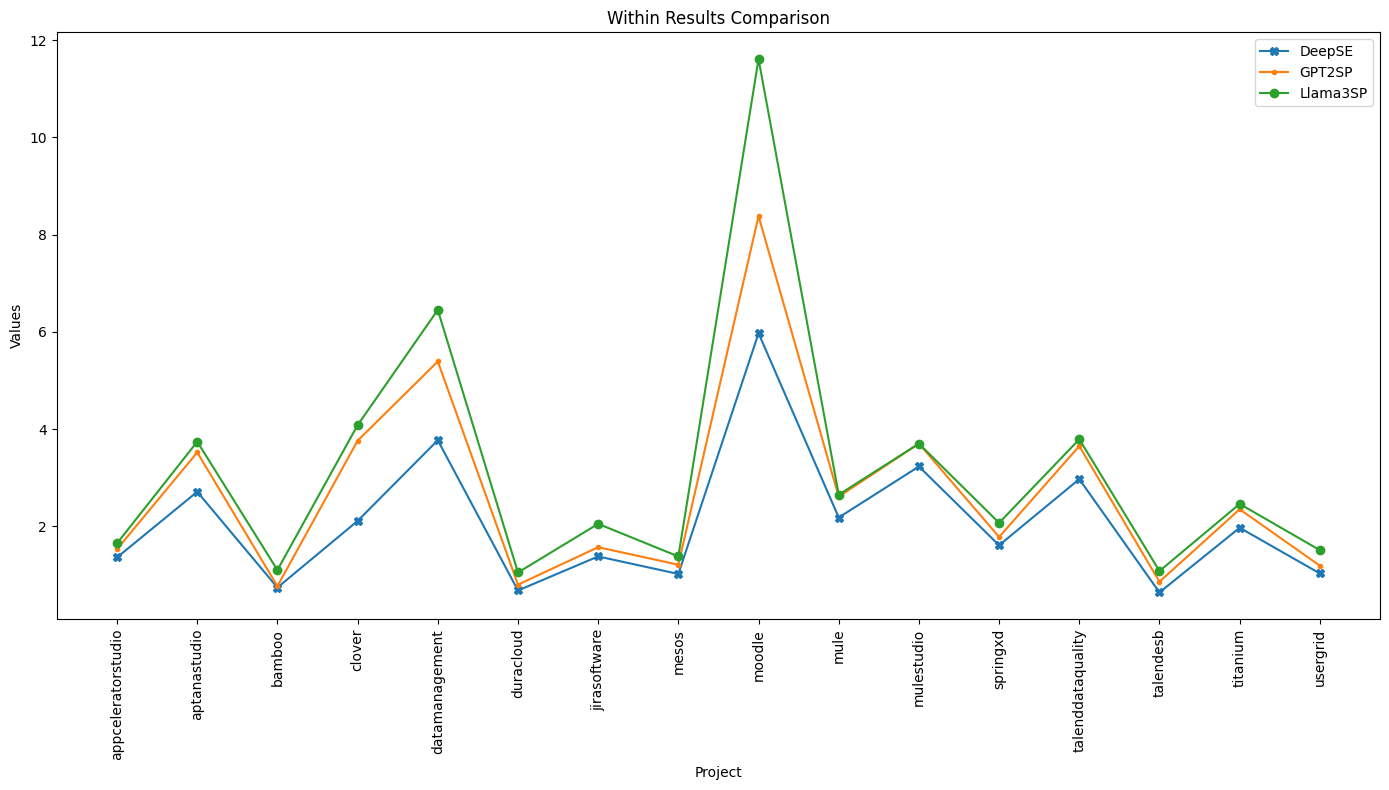

In [6]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the results of DeepSE
plt.plot(within_results['Project'], within_results['DeepSE'], label='DeepSE', marker='X')

# Plot the results of GPT2SP
plt.plot(within_results['Project'], within_results['GPT2SP'], label='GPT2SP', marker='.')

# Plot the results of LlamaSP
plt.plot(within_results['Project'], within_results['Llama3SP'], label='Llama3SP', marker='o')

# Plot the results of Llama3SP Custom model
# plt.plot(within_results['Project'], within_results['Llama3SPv2'], label='Llama3SPv2', marker='v')

# Plot the results of Llama3.2+SPWordLevel
# plt.plot(within_results['Project'], within_results['Llama3.2+SPWordLevel'], label='Llama3.2+SPWordLevel', marker='^')

# Plot the results of Llama3.2+SPWordPiece
# plt.plot(within_results['Project'], within_results['Llama3.2+SPWordPiece'], label='Llama3.2+SPWordPiece', marker='<')

# Plot the results of Llama3.2+SPSentencePiece
# plt.plot(within_results['Project'], within_results['Llama3.2+SPSentencePiece'], label='Llama3.2+SPSentencePiece', marker='>')

# Set labels and title
plt.xlabel('Project')
plt.ylabel('Values')
plt.title('Within Results Comparison')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()

# Save the plot
plt.savefig('plots/within_results_comparison.png')

plt.show()

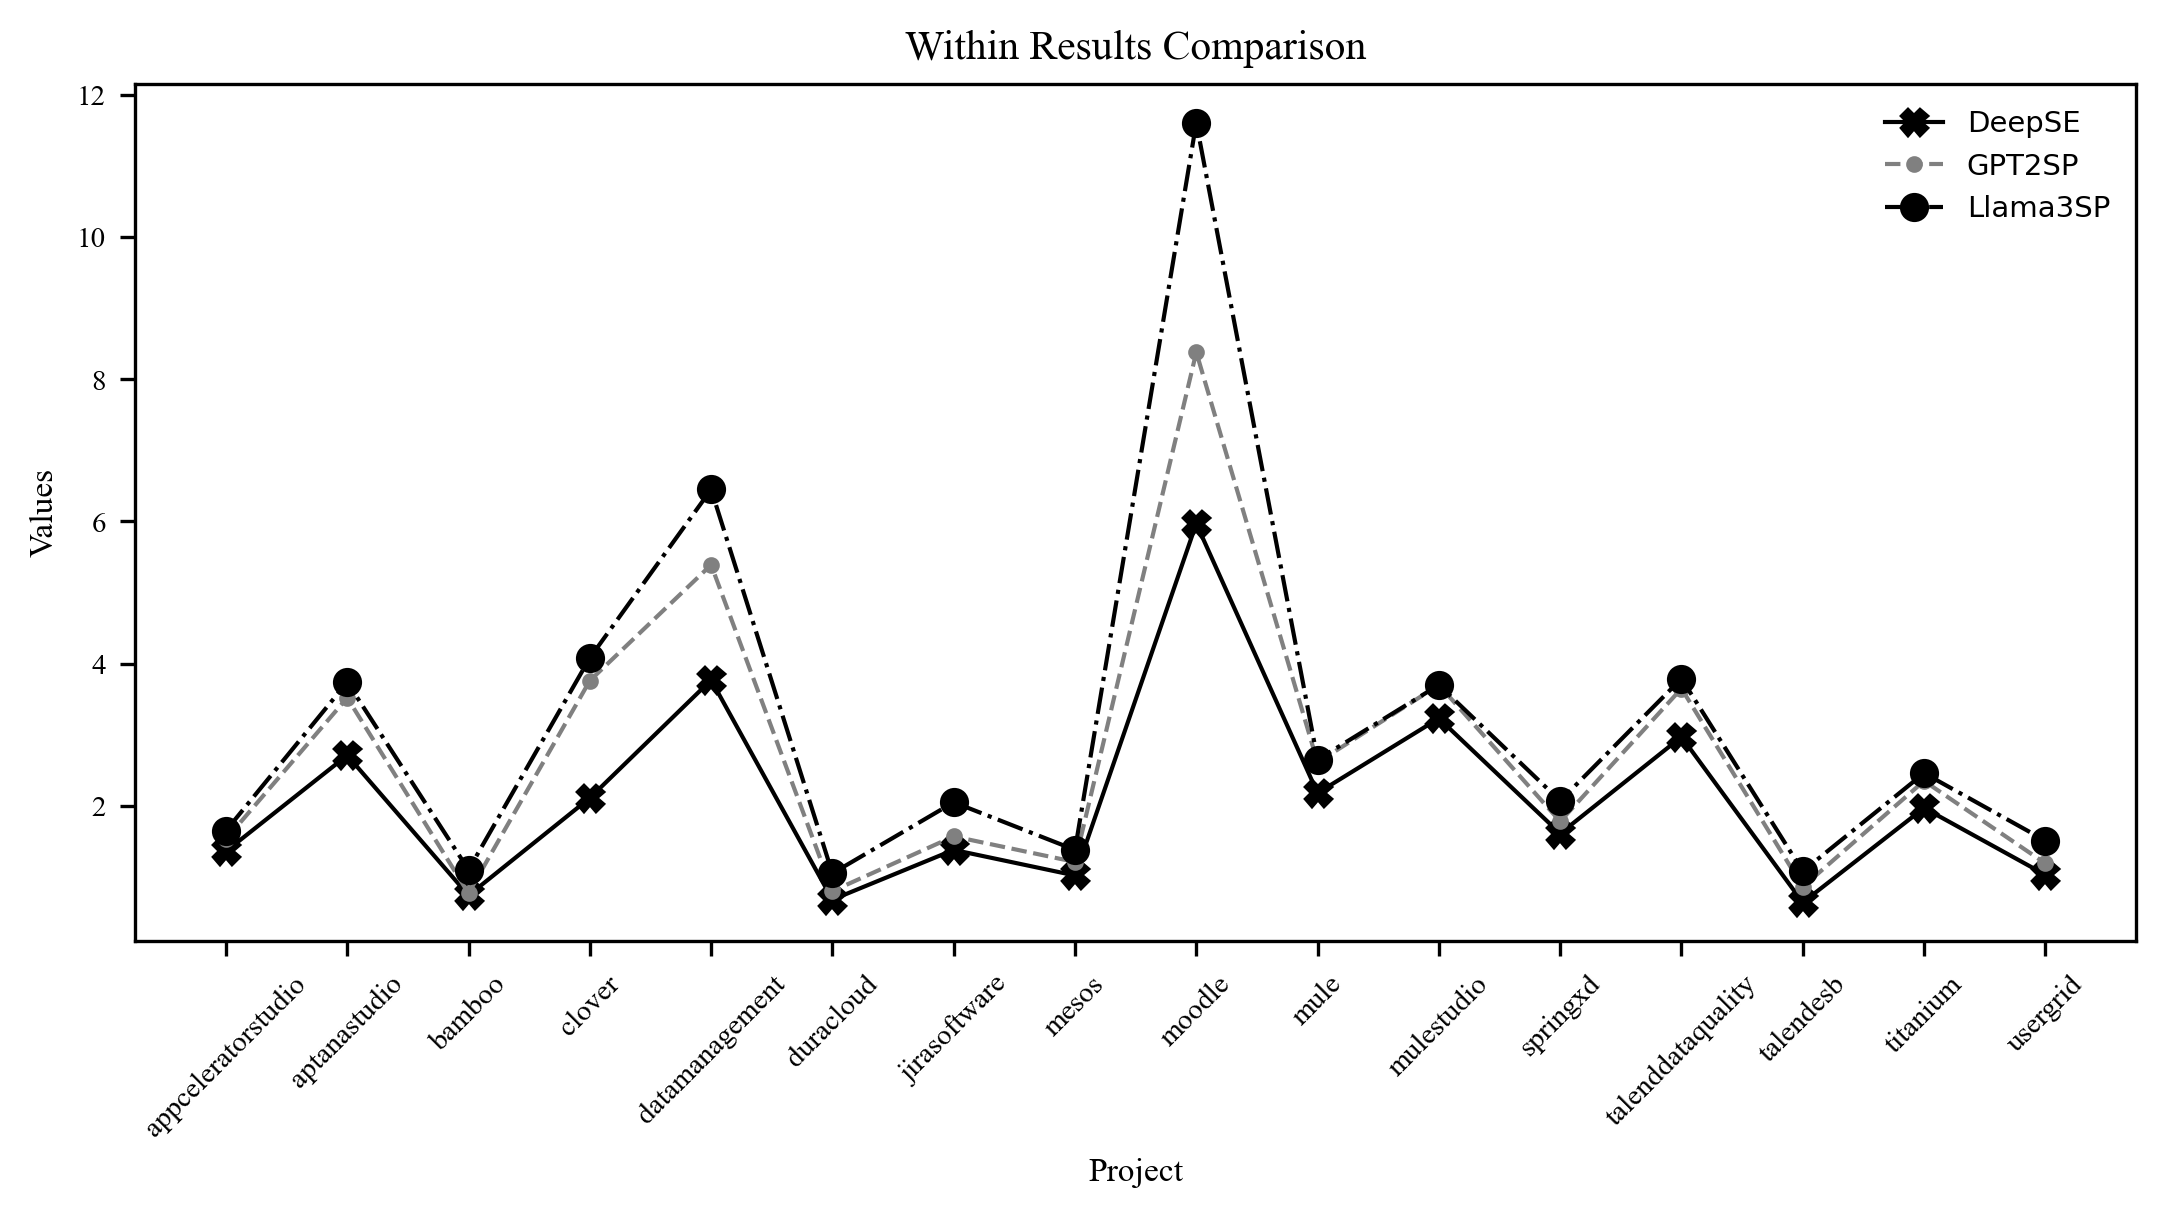

In [7]:
# Set the figure size to column width (3.5 inches) and high DPI for IEEE standards
plt.figure(figsize=(7.16, 4), dpi=300)  # Full page width (7.16 inches)

# Plot the results of DeepSE
plt.plot(within_results['Project'], within_results['DeepSE'], label='DeepSE', marker='X', linestyle='-', color='black', linewidth=1)

# Plot the results of GPT2SP
plt.plot(within_results['Project'], within_results['GPT2SP'], label='GPT2SP', marker='.', linestyle='--', color='gray', linewidth=1)

# Plot the results of LlamaSP
plt.plot(within_results['Project'], within_results['Llama3SP'], label='Llama3SP', marker='o', linestyle='-.', color='black', linewidth=1)

# Uncomment the following lines to include additional models if needed
# plt.plot(within_results['Project'], within_results['Llama3SPv2'], label='Llama3SPv2', marker='v', linestyle=':', color='gray')
# plt.plot(within_results['Project'], within_results['Llama3.2+SPWordLevel'], label='Llama3.2+SPWordLevel', marker='^', linestyle='-', color='black')
# plt.plot(within_results['Project'], within_results['Llama3.2+SPWordPiece'], label='Llama3.2+SPWordPiece', marker='<', linestyle='--', color='gray')
# plt.plot(within_results['Project'], within_results['Llama3.2+SPSentencePiece'], label='Llama3.2+SPSentencePiece', marker='>', linestyle='-.', color='black')

# Set labels and title with professional font sizes
plt.xlabel('Project', fontsize=8, fontname='Times New Roman')
plt.ylabel('Values', fontsize=8, fontname='Times New Roman')
plt.title('Within Results Comparison', fontsize=10, fontname='Times New Roman')

# Adjust x-axis ticks for clarity
plt.xticks(rotation=45, fontsize=7, fontname='Times New Roman')
plt.yticks(fontsize=7, fontname='Times New Roman')

# Add legend with smaller font size
plt.legend(fontsize=7, loc='best', frameon=False)

# Optimize layout for IEEE standards
plt.tight_layout(pad=0.5)

# Save the plot as a high-resolution image
plt.savefig('plots/within_results_comparison_bw.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [8]:
within_results = within_results.drop(columns=['SA'])

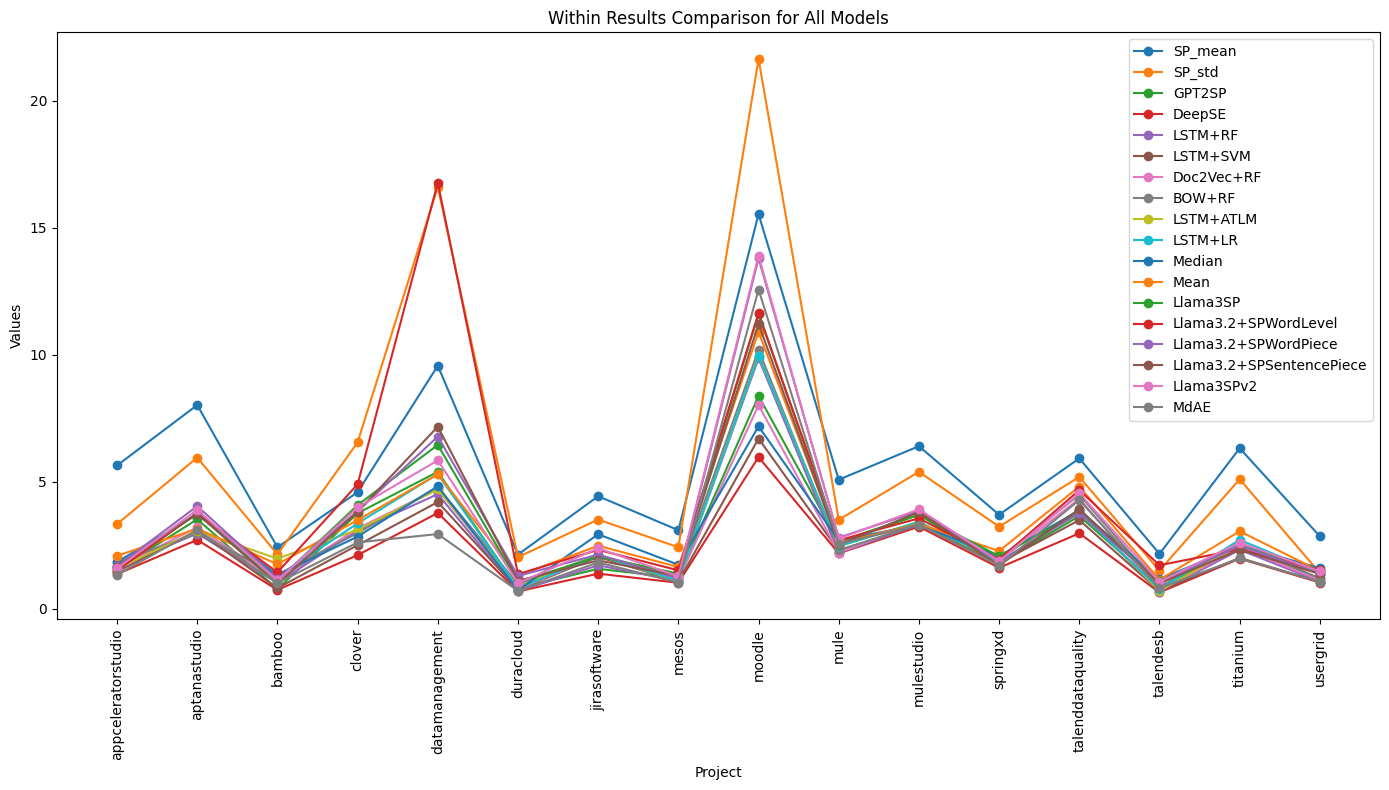

In [9]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the results of each model
for column in within_results.columns[1:]:
    plt.plot(within_results['Project'], within_results[column], label=column, marker='o')

# Set labels and title
plt.xlabel('Project')
plt.ylabel('Values')
plt.title('Within Results Comparison for All Models')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

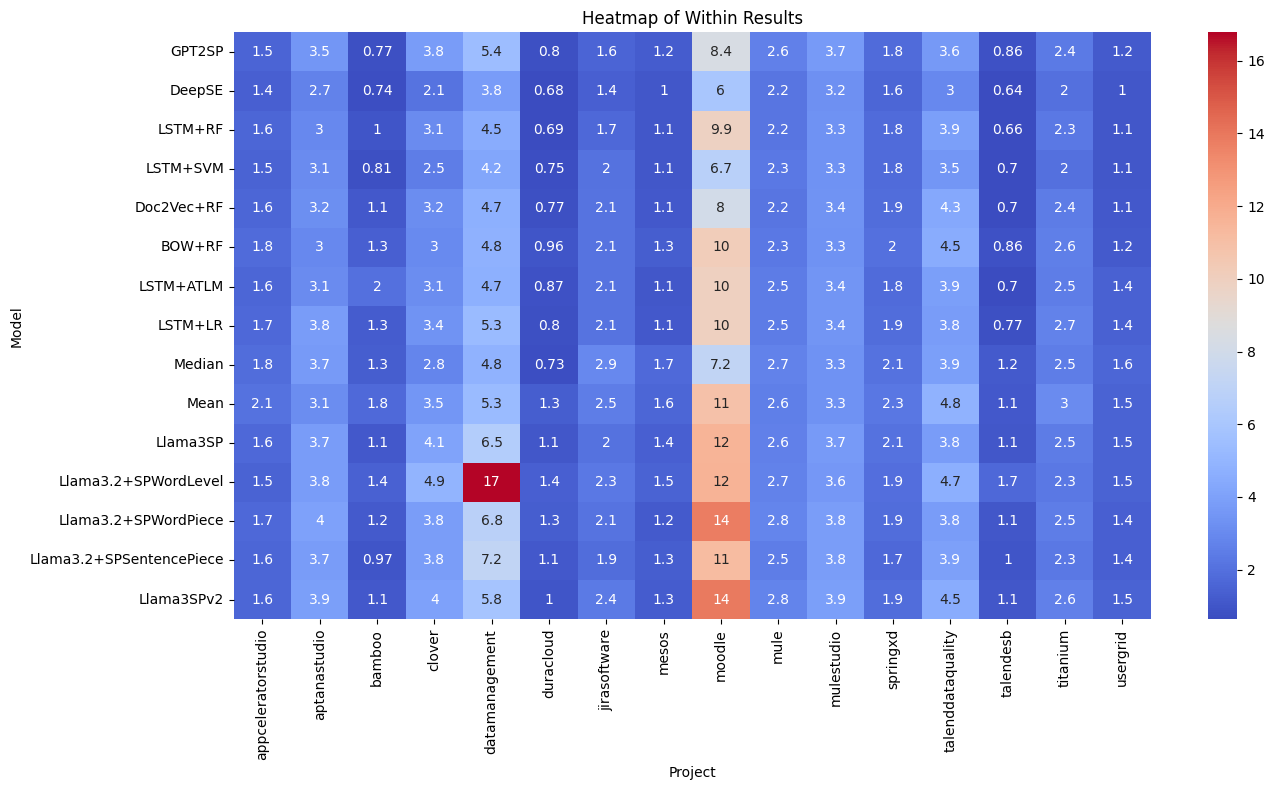

In [10]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Select the columns we want to plot
columns_to_plot = ['GPT2SP', 'DeepSE', 'LSTM+RF', 'LSTM+SVM', 'Doc2Vec+RF', 'BOW+RF', 'LSTM+ATLM', 'LSTM+LR', 'Median', 'Mean', 'Llama3SP', 'Llama3.2+SPWordLevel', 'Llama3.2+SPWordPiece', 'Llama3.2+SPSentencePiece', 'Llama3SPv2']

# Create the heatmap
sns.heatmap(within_results[columns_to_plot].T, annot=True, cmap='coolwarm', cbar=True, xticklabels=within_results['Project'], yticklabels=columns_to_plot)

# Set labels and title
plt.xlabel('Project')
plt.ylabel('Model')
plt.title('Heatmap of Within Results')

# Show the plot
plt.tight_layout()
# Save the plot to a file
plt.savefig('plots/heatmap_within_results.png')
plt.show()

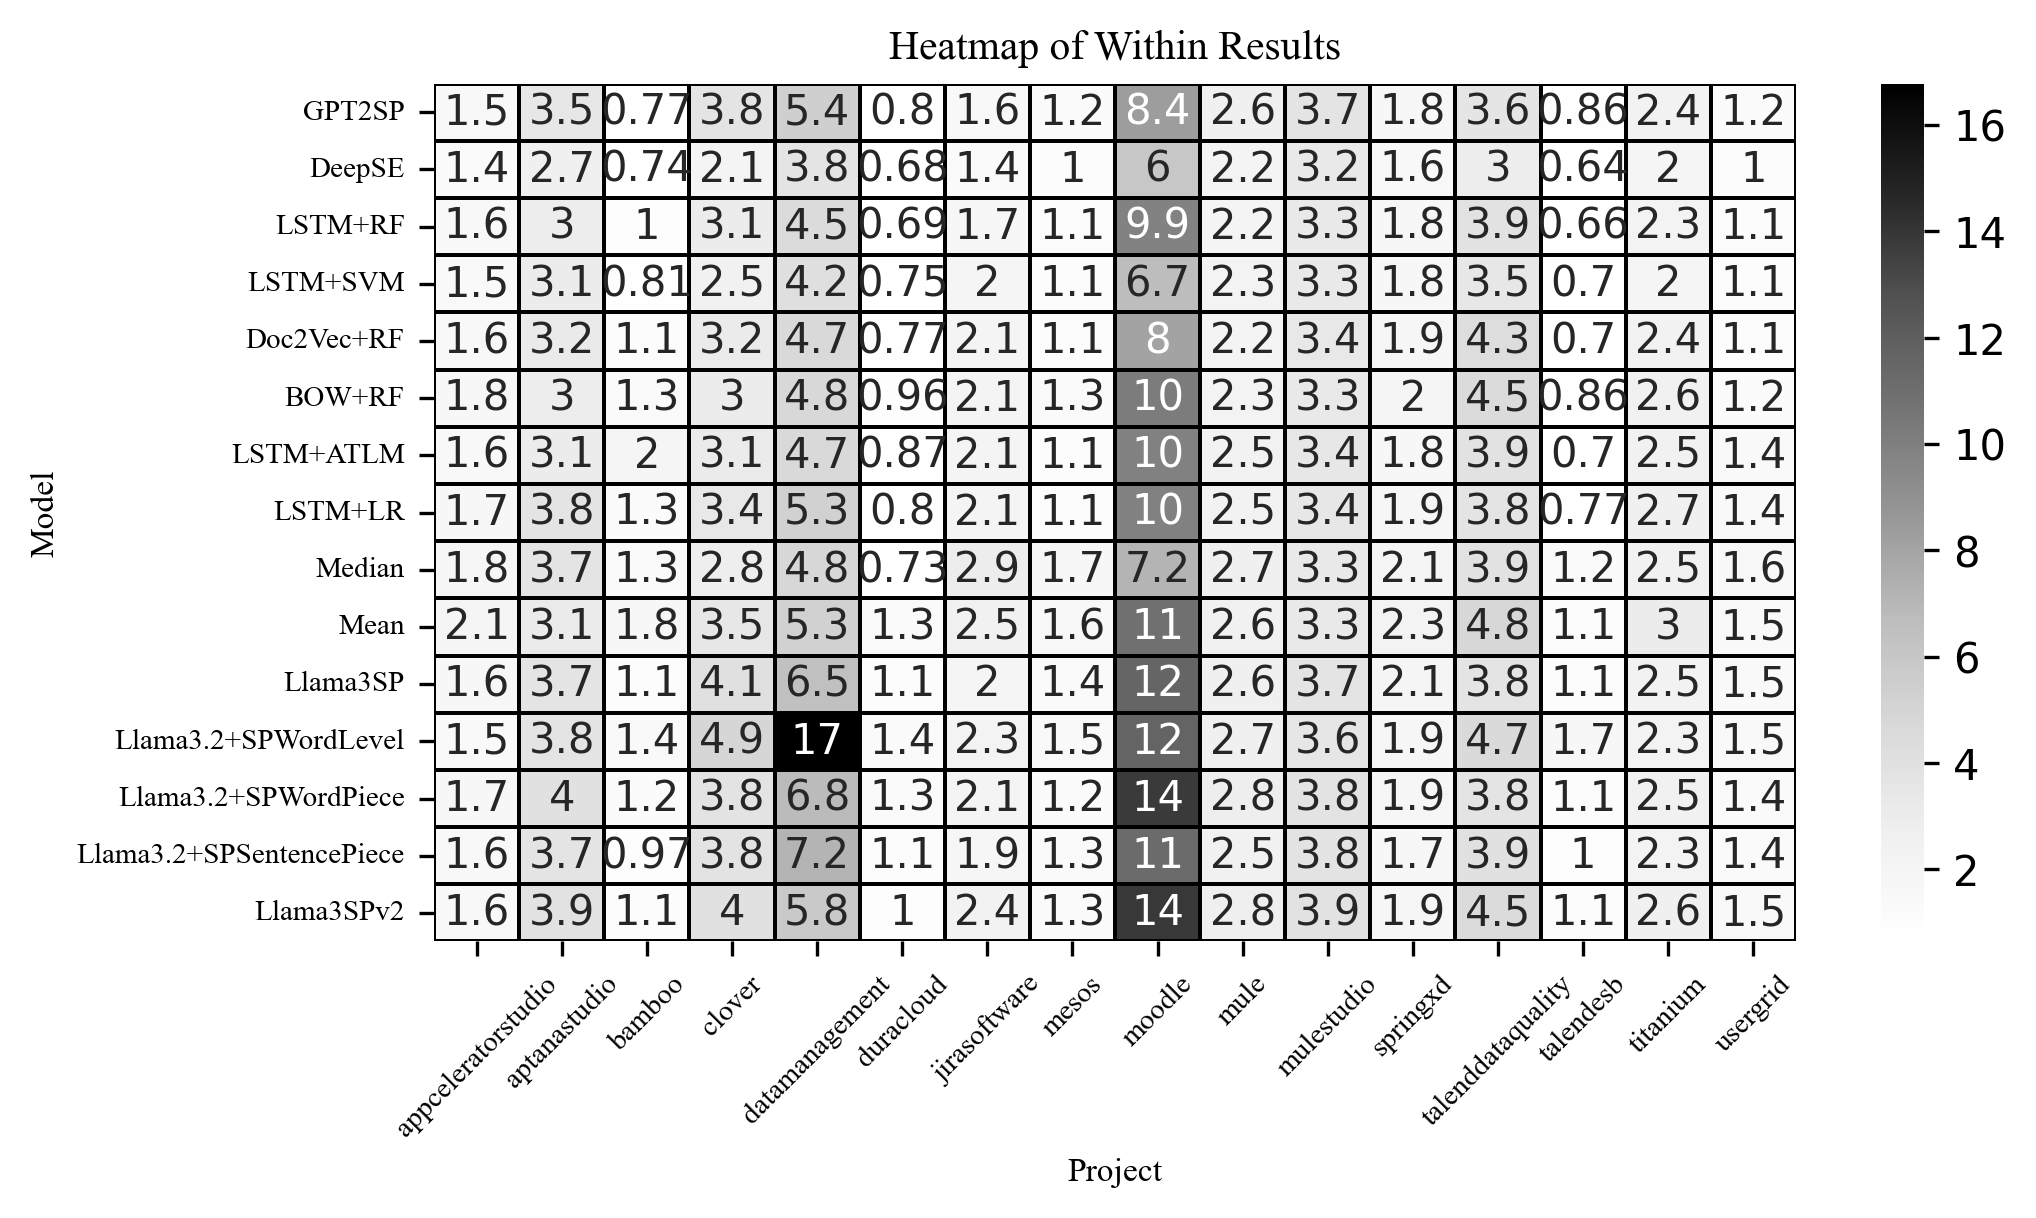

In [11]:
# Set the figure size to column width (3.5 inches) or page width (7.16 inches) and high DPI for IEEE standards
plt.figure(figsize=(7.16, 4), dpi=300)  # Full page width (7.16 inches)

# Select the columns we want to plot
columns_to_plot = ['GPT2SP', 'DeepSE', 'LSTM+RF', 'LSTM+SVM', 'Doc2Vec+RF', 'BOW+RF', 'LSTM+ATLM', 'LSTM+LR', 'Median', 'Mean', 'Llama3SP', 'Llama3.2+SPWordLevel', 'Llama3.2+SPWordPiece', 'Llama3.2+SPSentencePiece', 'Llama3SPv2']

# Create the heatmap in grayscale
sns.heatmap(
    within_results[columns_to_plot].T, 
    annot=True, 
    cmap='Greys',  # Grayscale colormap
    cbar=True, 
    xticklabels=within_results['Project'], 
    yticklabels=columns_to_plot,
    linewidths=0.5,  # Add gridlines for clarity
    linecolor='black'  # Gridline color
)

# Set labels and title with professional font sizes
plt.xlabel('Project', fontsize=8, fontname='Times New Roman')
plt.ylabel('Model', fontsize=8, fontname='Times New Roman')
plt.title('Heatmap of Within Results', fontsize=10, fontname='Times New Roman')

# Adjust x-axis and y-axis tick labels for clarity
plt.xticks(rotation=45, fontsize=7, fontname='Times New Roman')
plt.yticks(fontsize=7, fontname='Times New Roman')

# Optimize layout for IEEE standards
plt.tight_layout(pad=0.5)

# Save the plot as a high-resolution image
plt.savefig('plots/heatmap_within_results_bw.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

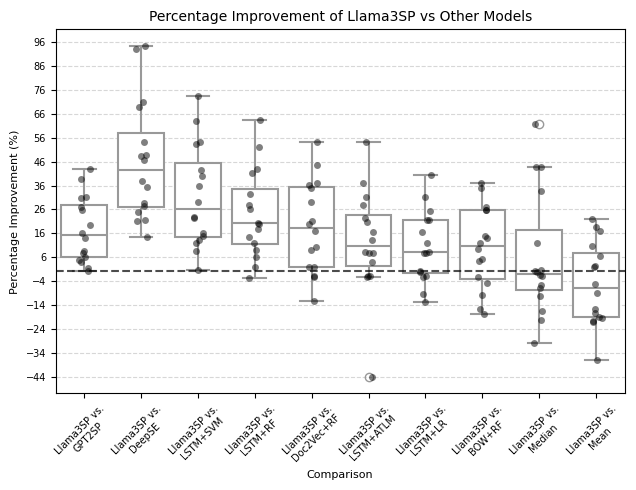

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('within_results.csv')

# Select models to compare with Llama3SP
models_to_compare = ['GPT2SP', 'DeepSE', 'LSTM+SVM', 'LSTM+RF', 'Doc2Vec+RF', 'LSTM+ATLM', 'LSTM+LR', 'BOW+RF', 'Median', 'Mean']

# Calculate percentage improvement for each model
percentage_improvements = {}
for model in models_to_compare:
    percentage_improvements[f'Llama3SP vs.\n{model}'] = ((data['Llama3SP'] - data[model]) / data[model] * 100)

# Create a DataFrame with the results
df_improvements = pd.DataFrame(percentage_improvements)

# Reshape data for plotting
df_improvements_melted = pd.melt(df_improvements.reset_index(), 
                                 id_vars=['index'],
                                 var_name='Comparison', 
                                 value_name='Percentage Improvement')

# Adjust figure size for IEEE two-column format (taller)
plt.figure(figsize=(6.5, 5))  # Increased height for better readability

# Draw the box plot in black and white
ax = sns.boxplot(x='Comparison', y='Percentage Improvement', data=df_improvements_melted, color='white', linewidth=1.5)

# Add individual points in black and white
sns.stripplot(x='Comparison', y='Percentage Improvement', data=df_improvements_melted, 
              color='black', alpha=0.5, jitter=True)

# Add a horizontal line at 0%
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)

# Improve appearance
plt.title('Percentage Improvement of Llama3SP vs Other Models', fontsize=10)
plt.ylabel('Percentage Improvement (%)', fontsize=8)
plt.xlabel('Comparison', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)

# Adjust y-axis ticks to show more values (10 or 20 intervals)
y_min, y_max = df_improvements_melted['Percentage Improvement'].min(), df_improvements_melted['Percentage Improvement'].max()
y_step = 10 if (y_max - y_min) / 10 < 20 else 20
plt.yticks(range(int(y_min), int(y_max) + y_step, y_step), fontsize=7)

# Adjust layout for better readability
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('plots/within_percentage_improvement.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

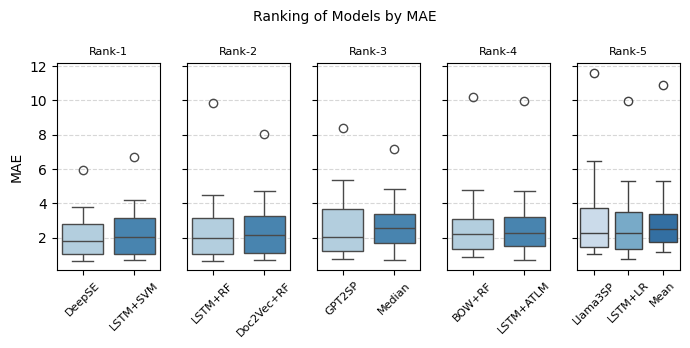

In [13]:
# Load the data
data = pd.read_csv('within_results.csv')

# Include Llama3SP in the ranking
models = ['Llama3SP', 'GPT2SP', 'DeepSE', 'LSTM+SVM', 'LSTM+RF', 'Doc2Vec+RF', 'BOW+RF', 'LSTM+ATLM', 'LSTM+LR', 'Median', 'Mean']

# Compute the mean MAE for each model
mean_mae = data[models].mean().sort_values()

# Assign ranks based on sorted MAE values
grouped_ranks = {}
num_ranks = 5  # Define 5 ranks
models_per_rank = len(models) // num_ranks

for i, model in enumerate(mean_mae.index):
    rank = f'Rank-{min(i // models_per_rank + 1, num_ranks)}'
    grouped_ranks[model] = rank

# Create a DataFrame for visualization
boxplot_data = []
for model in models:
    for value in data[model]:
        boxplot_data.append({'Rank': grouped_ranks[model], 'Model': model, 'MAE': value})

df_boxplot = pd.DataFrame(boxplot_data)

# Adjust figure size for IEEE paper format
fig_width = 7  # Adjust width to fit IEEE format
fig_height = 3.5  # Adjust height to fit within IEEE constraints
fig, axes = plt.subplots(1, num_ranks, figsize=(fig_width, fig_height), sharey=True)

# Plot each rank separately
for i, rank in enumerate(sorted(set(grouped_ranks.values()))):
    ax = axes[i]
    subset = df_boxplot[df_boxplot['Rank'] == rank]
    unique_models = subset['Model'].unique()
    palette = sns.color_palette("Blues", len(unique_models))
    sns.boxplot(x='Model', y='MAE', hue='Model', data=subset, palette=palette, ax=ax, dodge=False, legend=False)
    ax.set_title(rank, fontsize=8)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate labels diagonally and increase font size
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Improve appearance
fig.suptitle('Ranking of Models by MAE', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure with high resolution
fig.savefig('plots/ranked_mae_boxplot.png', dpi=300, bbox_inches='tight')

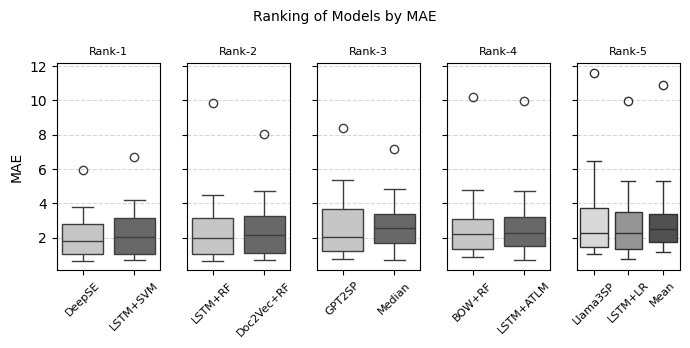

In [14]:
# Load the data
data = pd.read_csv('within_results.csv')

# Include Llama3SP in the ranking
models = ['Llama3SP', 'GPT2SP', 'DeepSE', 'LSTM+SVM', 'LSTM+RF', 'Doc2Vec+RF', 'BOW+RF', 'LSTM+ATLM', 'LSTM+LR', 'Median', 'Mean']

# Compute the mean MAE for each model
mean_mae = data[models].mean().sort_values()

# Assign ranks based on sorted MAE values
grouped_ranks = {}
num_ranks = 5  # Define 5 ranks
models_per_rank = len(models) // num_ranks

for i, model in enumerate(mean_mae.index):
    rank = f'Rank-{min(i // models_per_rank + 1, num_ranks)}'
    grouped_ranks[model] = rank

# Create a DataFrame for visualization
boxplot_data = []
for model in models:
    for value in data[model]:
        boxplot_data.append({'Rank': grouped_ranks[model], 'Model': model, 'MAE': value})

df_boxplot = pd.DataFrame(boxplot_data)

# Adjust figure size for IEEE paper format
fig_width = 7  # Adjust width to fit IEEE format
fig_height = 3.5  # Adjust height to fit within IEEE constraints
fig, axes = plt.subplots(1, num_ranks, figsize=(fig_width, fig_height), sharey=True)

# Plot each rank separately
for i, rank in enumerate(sorted(set(grouped_ranks.values()))):
    ax = axes[i]
    subset = df_boxplot[df_boxplot['Rank'] == rank]
    unique_models = subset['Model'].unique()
    # Use grayscale palette
    palette = sns.color_palette("Greys", len(unique_models))
    sns.boxplot(x='Model', y='MAE', hue='Model', data=subset, palette=palette, ax=ax, dodge=False, legend=False)
    ax.set_title(rank, fontsize=8)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate labels diagonally and increase font size
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Improve appearance
fig.suptitle('Ranking of Models by MAE', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure with high resolution
fig.savefig('plots/ranked_mae_boxplot_bw.png', dpi=300, bbox_inches='tight')

## Cross Project Models Analysis

### Results dataframe

In [15]:
llama3_cross_results = pd.read_csv("./llama3_cross_results.csv")
llama3_cross_results.rename(columns={"Llama3.2": "Llama3SP"}, inplace=True)
llama3sp_cross_results = pd.read_csv("./llama3sp_cross_results.csv")
llama3sp_cross_results.rename(columns={"MAE": "Llama3SPv2"}, inplace=True)

In [16]:
cross_results = llama3_cross_results
cross_results = cross_results.merge(llama3sp_cross_results, on=['Train', 'Test'], how='left')

cross_results

,Train,Test,Llama3SP,Llama3.2+SPWordLevel,Llama3.2+SPWordPiece,Llama3.2+SPSentencePiece,Llama3SPv2,MdAE,SA
0,mesos,usergrid,1.34,1.40,1.38,1.05,1.37,1.06,39.19
1,usergrid,mesos,1.74,1.73,1.60,1.56,1.45,1.20,40.64
2,appceleratorstudio,aptanastudio,4.36,5.22,4.28,4.31,1.53,1.23,66.62
3,appceleratorstudio,titanium,3.36,3.76,3.40,3.30,1.70,1.45,62.93
4,titanium,appceleratorstudio,2.55,2.64,2.36,2.36,2.65,2.19,44.29
5,aptanastudio,titanium,3.78,3.64,4.11,3.78,3.48,2.80,48.17
6,mule,mulestudio,3.57,4.07,3.43,3.65,2.73,2.52,33.71
7,mulestudio,mule,2.98,3.07,3.08,3.31,3.87,3.04,39.99
8,clover,usergrid,2.02,2.53,2.07,1.48,4.17,2.55,6.60
9,talendesb,mesos,1.52,1.95,1.60,1.66,1.07,0.87,30.58


In [17]:
cross_results.to_csv('cross_results.csv', index=False)

In [18]:
cross_results = cross_results.drop(columns=['SA', 'MdAE'])

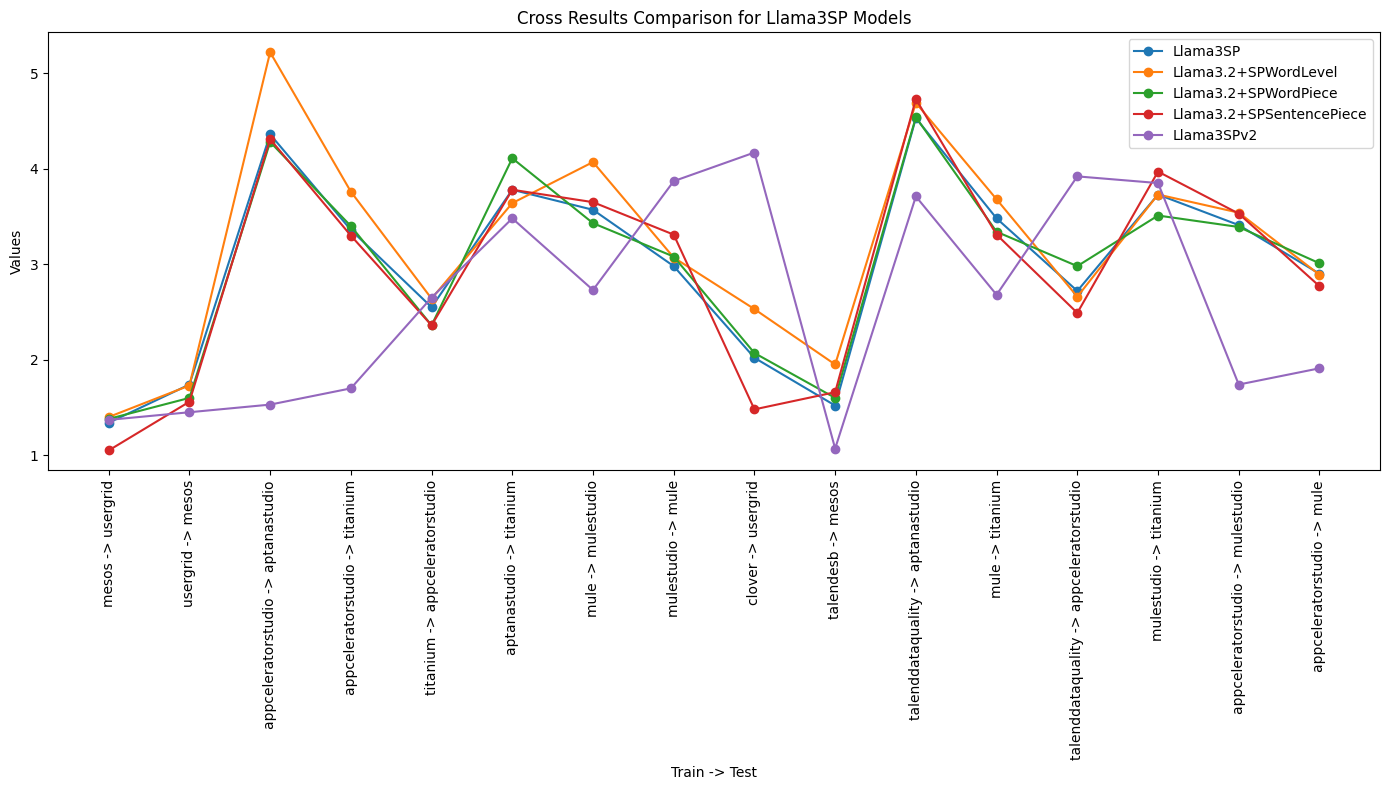

In [19]:
# Combine Train and Test columns into a new column 'train_test'
cross_results['train_test'] = cross_results['Train'] + ' -> ' + cross_results['Test']

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the results of each model
for column in cross_results.columns[2:-1]:  # Exclude 'Train', 'Test', and 'train_test' columns
    plt.plot(cross_results['train_test'], cross_results[column], label=column, marker='o')

# Set labels and title
plt.xlabel('Train -> Test')
plt.ylabel('Values')
plt.title('Cross Results Comparison for Llama3SP Models')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()

# Save the plot
plt.savefig('plots/cross_results_comparison.png')

plt.show()

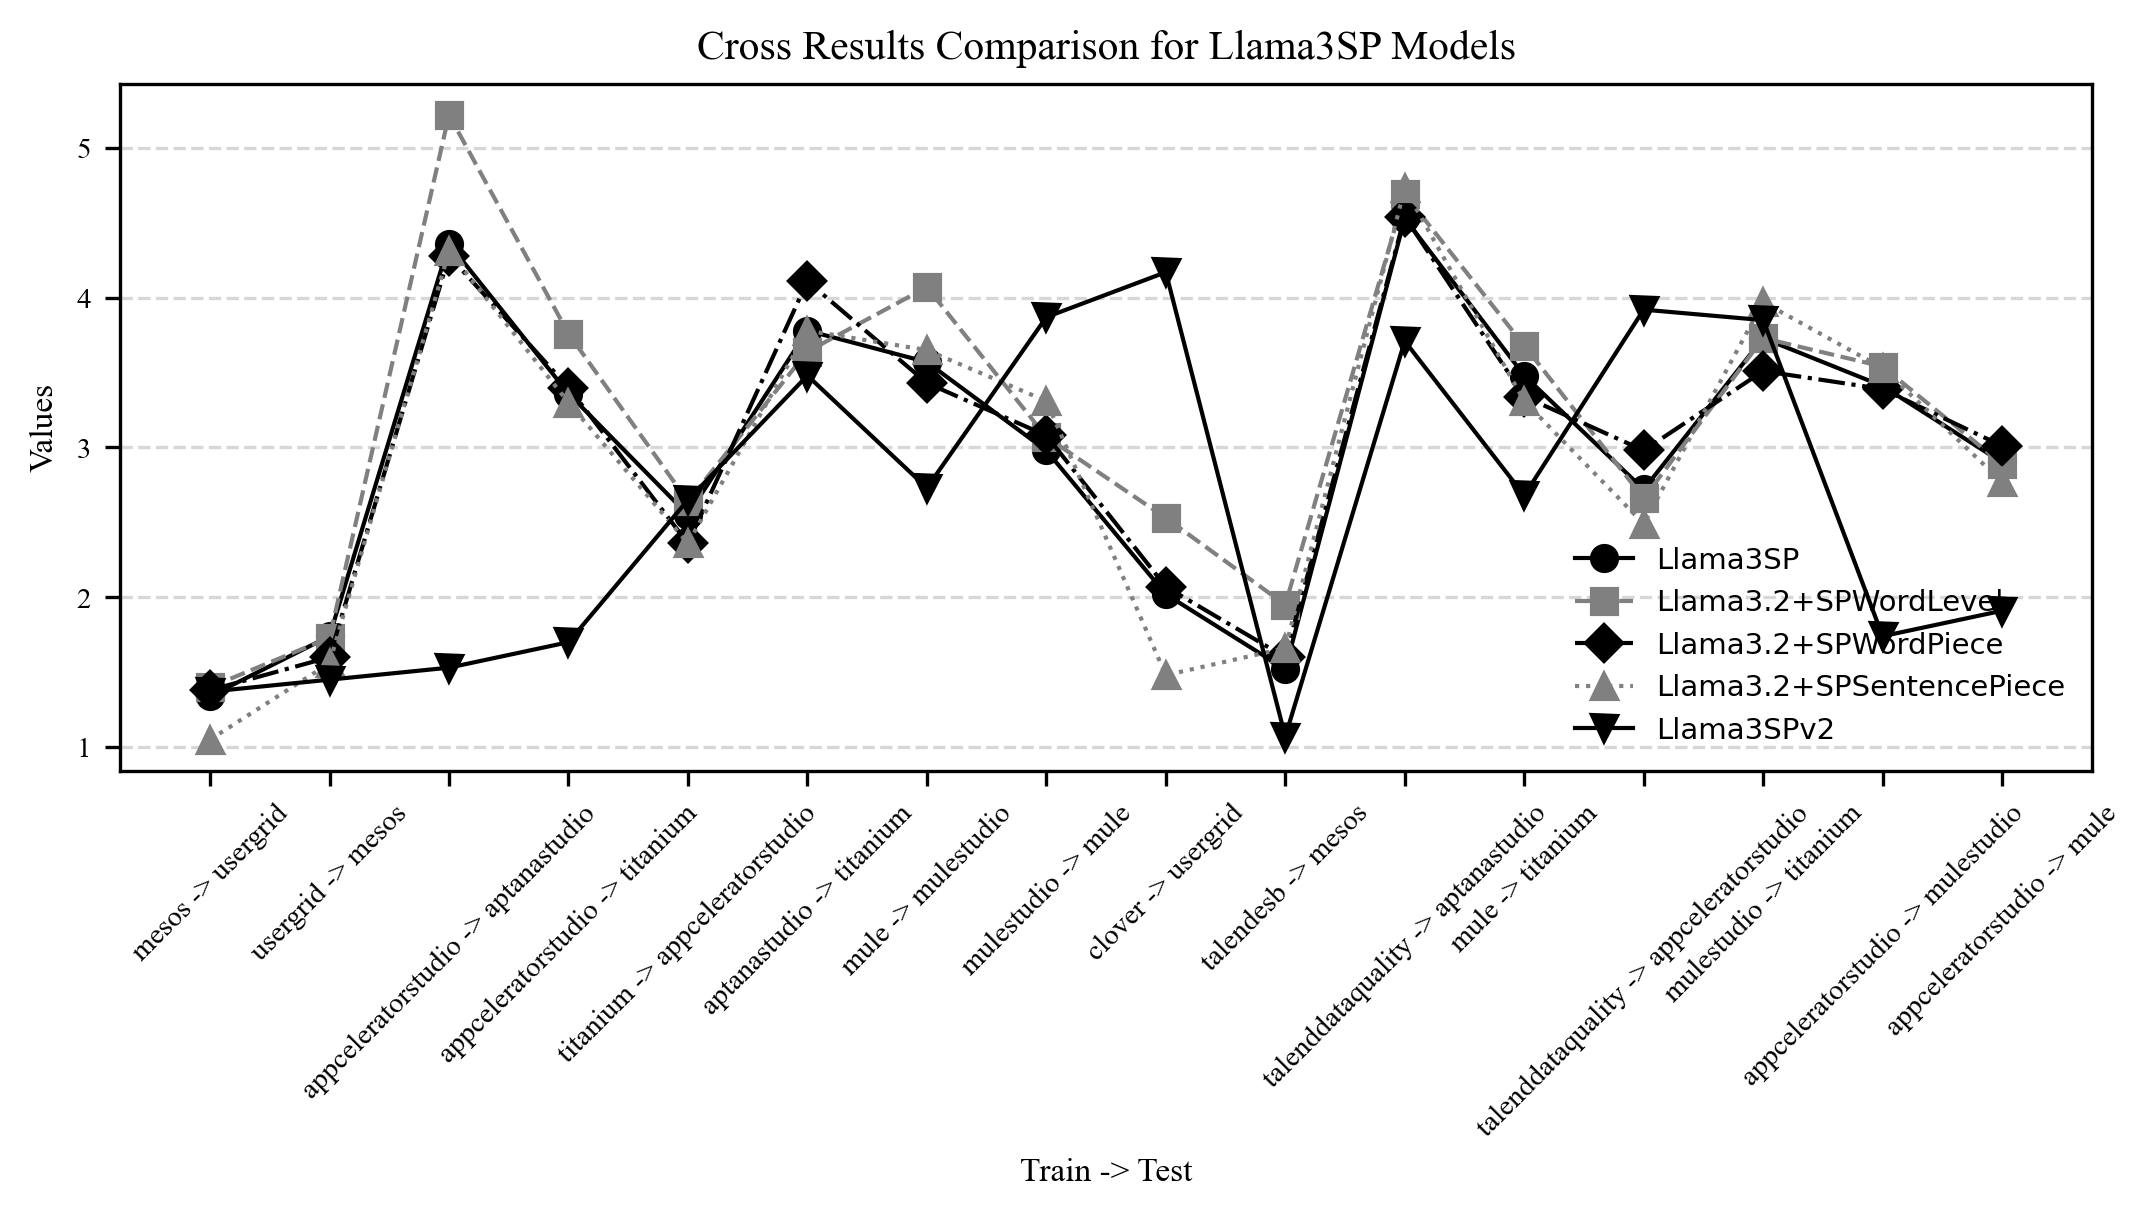

In [20]:
# Combine Train and Test columns into a new column 'train_test'
cross_results['train_test'] = cross_results['Train'] + ' -> ' + cross_results['Test']

# Set the figure size to page width (7.16 inches) for IEEE standards
plt.figure(figsize=(7.16, 4), dpi=300)  # Full page width (7.16 inches)

# Define different line styles and markers for each model
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'X', 'P', '*']
colors = ['black', 'gray']  # Use only grayscale colors

# Plot the results of each model with unique styles
for i, column in enumerate(cross_results.columns[2:-1]):  # Exclude 'Train', 'Test', and 'train_test' columns
    plt.plot(
        cross_results['train_test'], 
        cross_results[column], 
        label=column, 
        marker=markers[i % len(markers)], 
        linestyle=line_styles[i % len(line_styles)], 
        linewidth=1, 
        color=colors[i % len(colors)]  # Alternate between black and gray
    )

# Set labels and title with professional font sizes
plt.xlabel('Train -> Test', fontsize=8, fontname='Times New Roman')
plt.ylabel('Values', fontsize=8, fontname='Times New Roman')
plt.title('Cross Results Comparison for Llama3SP Models', fontsize=10, fontname='Times New Roman')

# Adjust x-axis ticks for clarity
plt.xticks(rotation=45, fontsize=7, fontname='Times New Roman')
plt.yticks(fontsize=7, fontname='Times New Roman')

# Add legend with smaller font size
plt.legend(fontsize=7, loc='best', frameon=False)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimize layout for IEEE standards
plt.tight_layout(pad=0.5)

# Save the plot as a high-resolution image
plt.savefig('plots/cross_results_comparison_bw.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()